<a href="https://colab.research.google.com/github/EktaU21/XAI_Cryptocurrency_Money_Laundering/blob/main/GraphLIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html


In [2]:
! pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
! pip install torch-spline-conv -f https://data.pyg.org/whl/torch-{torch.__version__}.html

Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html
Looking in links: https://data.pyg.org/whl/torch-2.6.0+cu124.html


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import torch
from torch.nn import Linear, LayerNorm, ReLU, Dropout
import torch.nn.functional as F
from torch_geometric.nn import ChebConv, NNConv, DeepGCNLayer, GATConv, DenseGCNConv, GCNConv, GraphConv
from torch_geometric.data import Data, DataLoader

from sklearn.metrics import roc_auc_score
import scipy.sparse as sp

import warnings
warnings.filterwarnings("ignore")

In [5]:
import os
import networkx as nx
from tqdm.notebook import tqdm

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


from torch_geometric.nn import GATConv
from torch_geometric.utils import to_networkx
from torch_geometric.transforms import NormalizeFeatures

!pip install graphlime
from graphlime import GraphLIME

import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
from torch_geometric.nn import ChebConv, NNConv, DeepGCNLayer, GATConv, DenseGCNConv, GCNConv, GraphConv
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm, trange

In [11]:
pip install --upgrade graphlime


In [8]:
file_path = "/usr/local/lib/python3.11/dist-packages/graphlime/__init__.py"

# Read the contents of the file
with open(file_path, "r") as file:
    content = file.read()

# Remove all occurrences of "normalize=False" or "normalize=True"
import re
content = re.sub(r",?\s*normalize\s*=\s*(True|False)", "", content)

# Write the cleaned content back
with open(file_path, "w") as file:
    file.write(content)

print("✅ All 'normalize=' arguments removed from GraphLIME. Now restart your runtime and rerun the code.")


✅ All 'normalize=' arguments removed from GraphLIME. Now restart your runtime and rerun the code.


# **GraphLIME_GAT**

Data(x=[6621, 165], edge_index=[2, 8316], y=[6621], train_mask=[6621], val_mask=[6621])
Node 5953 has the largest degree value 47.


  1%|          | 3/300 [00:00<00:10, 29.68it/s]

Epoch:   0, acc = 0.707


  5%|▌         | 15/300 [00:00<00:09, 30.29it/s]

Epoch:  10, acc = 0.887


  9%|▊         | 26/300 [00:00<00:09, 29.21it/s]

Epoch:  20, acc = 0.943


 12%|█▏        | 37/300 [00:01<00:08, 30.31it/s]

Epoch:  30, acc = 0.968


 15%|█▌        | 45/300 [00:01<00:08, 28.83it/s]

Epoch:  40, acc = 0.976


 18%|█▊        | 54/300 [00:01<00:08, 28.47it/s]

Epoch:  50, acc = 0.975


 21%|██        | 63/300 [00:02<00:10, 23.40it/s]

Epoch:  60, acc = 0.980


 25%|██▌       | 75/300 [00:02<00:10, 20.95it/s]

Epoch:  70, acc = 0.985


 28%|██▊       | 84/300 [00:03<00:11, 19.59it/s]

Epoch:  80, acc = 0.984


 32%|███▏      | 95/300 [00:03<00:10, 19.94it/s]

Epoch:  90, acc = 0.985


 34%|███▍      | 103/300 [00:04<00:09, 20.63it/s]

Epoch: 100, acc = 0.983


 38%|███▊      | 113/300 [00:04<00:10, 18.11it/s]

Epoch: 110, acc = 0.988


 42%|████▏     | 125/300 [00:05<00:08, 20.22it/s]

Epoch: 120, acc = 0.988


 44%|████▍     | 132/300 [00:05<00:08, 19.53it/s]

Epoch: 130, acc = 0.989


 49%|████▉     | 147/300 [00:06<00:06, 24.74it/s]

Epoch: 140, acc = 0.991


 52%|█████▏    | 156/300 [00:06<00:05, 27.66it/s]

Epoch: 150, acc = 0.990


 55%|█████▌    | 165/300 [00:07<00:04, 27.69it/s]

Epoch: 160, acc = 0.987


 59%|█████▉    | 177/300 [00:07<00:04, 30.27it/s]

Epoch: 170, acc = 0.989


 62%|██████▏   | 185/300 [00:07<00:03, 30.37it/s]

Epoch: 180, acc = 0.991


 65%|██████▌   | 196/300 [00:08<00:03, 28.62it/s]

Epoch: 190, acc = 0.992


 69%|██████▉   | 207/300 [00:08<00:02, 31.88it/s]

Epoch: 200, acc = 0.991


 72%|███████▏  | 215/300 [00:08<00:02, 34.08it/s]

Epoch: 210, acc = 0.991


 76%|███████▌  | 227/300 [00:08<00:02, 34.21it/s]

Epoch: 220, acc = 0.992


 78%|███████▊  | 235/300 [00:09<00:01, 33.70it/s]

Epoch: 230, acc = 0.989


 82%|████████▏ | 247/300 [00:09<00:01, 34.96it/s]

Epoch: 240, acc = 0.991


 85%|████████▌ | 255/300 [00:09<00:01, 35.28it/s]

Epoch: 250, acc = 0.990


 89%|████████▉ | 267/300 [00:10<00:00, 33.83it/s]

Epoch: 260, acc = 0.991


 92%|█████████▏| 275/300 [00:10<00:00, 34.72it/s]

Epoch: 270, acc = 0.989


 96%|█████████▌| 287/300 [00:10<00:00, 35.87it/s]

Epoch: 280, acc = 0.993


 98%|█████████▊| 295/300 [00:10<00:00, 35.21it/s]

Epoch: 290, acc = 0.990


100%|██████████| 300/300 [00:11<00:00, 27.01it/s]


The 2-th feature is the most important.


<Figure size 1600x1200 with 0 Axes>

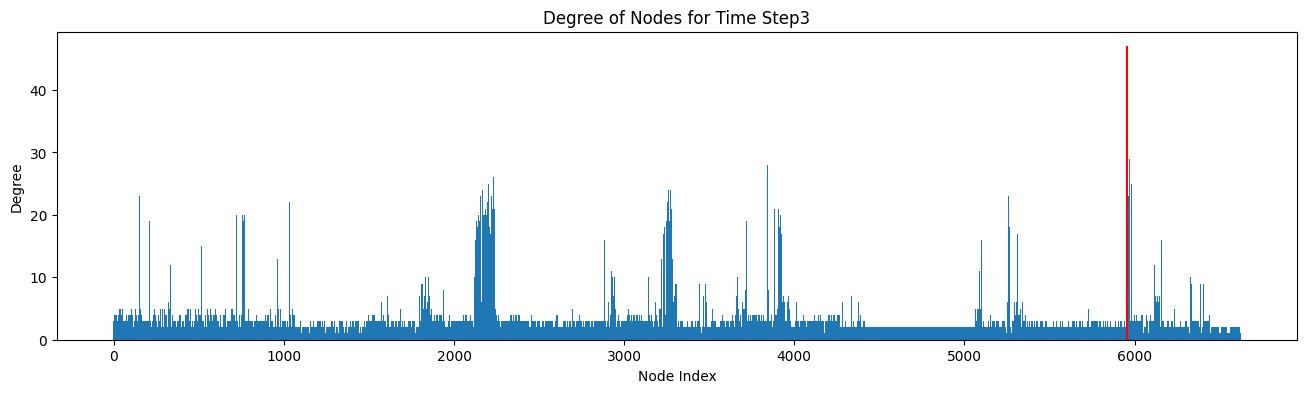

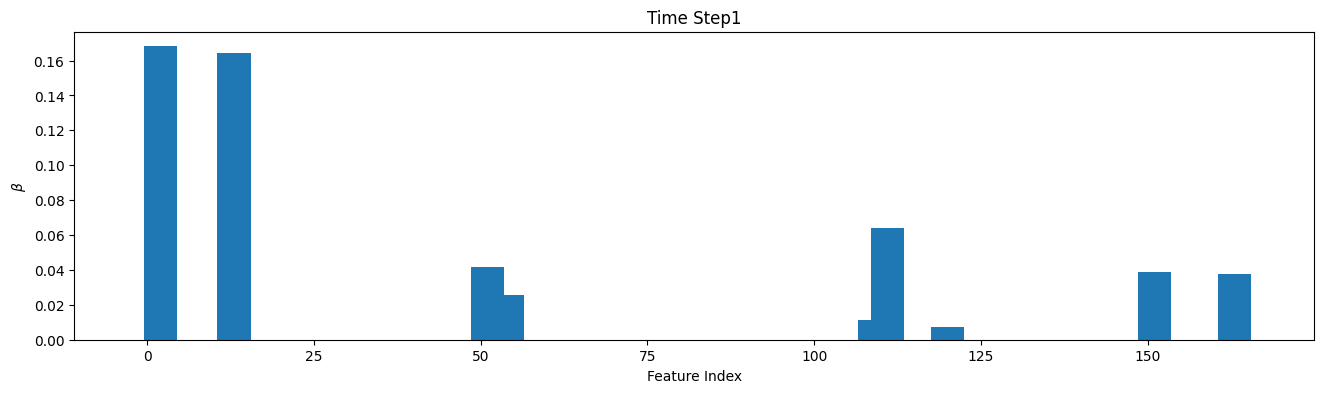

In [21]:
def test(srno):

  df_features = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)
  df_edges = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
  df_classes =  pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
  df_classes['class'] = df_classes['class'].map({'unknown': 2, '1':1, '2':0})

  # merging dataframes
  df_merge = df_features.merge(df_classes, how='left', right_on="txId", left_on=0)
  df_merge = df_merge.loc[df_merge[1] == srno]
  df_merge = df_merge.sort_values(0).reset_index(drop=True)
  classified = df_merge.loc[df_merge['class'].loc[df_merge['class']!=2].index].drop('txId', axis=1)
  unclassified = df_merge.loc[df_merge['class'].loc[df_merge['class']==2].index].drop('txId', axis=1)

  # storing classified unclassified nodes seperatly for training and testing purpose
  classified_edges = df_edges.loc[df_edges['txId1'].isin(classified[0]) & df_edges['txId2'].isin(classified[0])]
  unclassified_edges = df_edges.loc[df_edges['txId1'].isin(unclassified[0]) | df_edges['txId2'].isin(unclassified[0])]
  del df_features, df_classes

  edgess =  df_edges.loc[df_edges['txId1'].isin(df_merge[0]) & df_edges['txId2'].isin(df_merge[0])]

  # all nodes in data
  nodes = df_merge[0].values
  map_id = {j:i for i,j in enumerate(nodes)} # mapping nodes to indexes

  edges = edgess.copy()
  edges.txId1 = edges.txId1.map(map_id)
  edges.txId2 = edges.txId2.map(map_id)
  #edges = edges.astype(int)

  edge_index = np.array(edges.values).T

  edge_index = torch.tensor(edge_index, dtype=torch.long).contiguous()
  weights = torch.tensor([1]* edge_index.shape[1] , dtype=torch.double)
  #print(edge_index.shape)

  # maping txIds to corresponding indexes, to pass node features to the model
  node_features = df_merge.drop(['txId'], axis=1).copy()
  node_features[0] = node_features[0].map(map_id)
  classified_idx = node_features['class'].loc[node_features['class']!=2].index
  unclassified_idx = node_features['class'].loc[node_features['class']==2].index
  # replace unkown class with 0, to avoid having 3 classes, this data/labels never used in training
  node_features['class'] = node_features['class'].replace(2, 0)
  #print(len(classified_idx))

  labels = node_features['class'].values
  node_features = torch.tensor(np.array(node_features.drop([0, 'class', 1], axis=1).values, dtype=np.double), dtype=torch.double)

  # converting data to PyGeometric graph data format
  data_train = Data(x=node_features, edge_index=edge_index, edge_attr=weights,
                               y=torch.tensor(labels, dtype=torch.double)) #, adj= torch.from_numpy(np.array(adj))

  #print(data_train)

  y_train = labels[classified_idx]

  # spliting train set and validation set
  from sklearn.model_selection import train_test_split
  X_train, X_valid, y_train, y_valid, train_idx, valid_idx = train_test_split(node_features[classified_idx], y_train, classified_idx, test_size=0.15, random_state=42, stratify=y_train)

  train_idx
  ten_train_idx = torch.tensor(train_idx)
  ten_train_idx

  from torch_geometric.utils import index_to_mask, mask_to_index
  train_mask = index_to_mask(ten_train_idx, size= len(labels))
  train_mask.shape

  valid_idx
  ten_valid_idx = torch.tensor(valid_idx)
  ten_valid_idx

  from torch_geometric.utils import index_to_mask, mask_to_index
  val_mask = index_to_mask(ten_valid_idx, size= len(labels))
  val_mask.shape

  # converting data to PyGeometric graph data format
  data_train = Data(x=torch.tensor(node_features,dtype=torch.float),
                  edge_index=edge_index, #edge_attr=weights,
                               y=torch.tensor(labels, dtype=torch.long),
                  train_mask=torch.tensor(train_mask,dtype=torch.bool),
                  val_mask=torch.tensor(val_mask,dtype=torch.bool)) #, adj= torch.from_numpy(np.array(adj))

  print(data_train)
  with open("/content/drive/MyDrive/GraphLIME_TS/Information/result.txt", "a+") as o:
    o.write('\nTime Step ' + str(srno) + '\n')
    o.write(f' {data_train}')

  #visualize the Graph
  plt.figure(figsize=(16, 12))
  G = to_networkx(data_train, to_undirected=True)

  #extract the degree value
  degrees = dict(nx.degree(G))
  node_indices = list(degrees.keys())
  node_degrees = list(degrees.values())

  max_degree = max(node_degrees)
  node_idx = np.argmax(node_degrees).item()

  plt.figure(figsize=(16, 4))
  plt.bar(node_indices, node_degrees, width=5.0)
  plt.vlines(x=node_idx, ymin=0, ymax=max_degree, colors='r')
  plt.title('Degree of Nodes for Time Step'+str(srno))
  plt.xlabel('Node Index')
  plt.ylabel('Degree');

  rootdir = '/content/drive/MyDrive/GraphLIME_TS/features/'
  output_file = os.path.join(rootdir, 'TS'+ str(srno) + '.png')
  plt.savefig(output_file)


  print(f'Node {node_idx} has the largest degree value {max_degree}.')

  #define a GAT class

  class GAT(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim,
                 heads_1=8, heads_2=1, att_dropout=0.6, input_dropout=0.6):

        super(GAT, self).__init__()

        self.att_dropout = att_dropout
        self.input_dropout = input_dropout

        self.conv1 = GATConv(in_channels=input_dim,
                             out_channels=hidden_dim // heads_1,
                             heads=heads_1,
                             concat=True,
                             dropout=att_dropout)
        self.conv2 = GATConv(in_channels=hidden_dim,
                             out_channels=output_dim,
                             heads=heads_2,
                             concat=False,
                             dropout=att_dropout)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=self.input_dropout, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=self.input_dropout, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

 #Instantiate a GAT model
  hparams = {
    'input_dim': data_train.num_node_features,
    'hidden_dim':8,
    'output_dim': int(max(data_train.y).item()) + 1
  }
  model = GAT(**hparams)
  model

  #Train the model
  def accuracy(output, labels):
    _, pred = output.max(dim=1)
    correct = pred.eq(labels).double()
    correct = correct.sum()

    return correct / len(labels)

  lr = 0.005
  #change the lr and epochs to 0.01 and 200
  epochs =300

  model.train()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()

    output = model(data_train.x, data_train.edge_index)
    loss = F.nll_loss(output[data_train.train_mask], data_train.y[data_train.train_mask])

    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        acc = accuracy(output[data_train.train_mask], data_train.y[data_train.train_mask])
        print('Epoch: {:3d}, acc = {:.3f}'.format(epoch, acc))

  #Explain node features
  node_idx
  model.eval()

  # instantiate a GraphLIME object
  explainer = GraphLIME(model, hop=2, rho=0.1, cached=True)

  # explain node features by calling the method `explain_node()`
  coefs = explainer.explain_node(node_idx, data_train.x, data_train.edge_index)
  coefs

  with open("/content/drive/MyDrive/GraphLIME_TS/Information/matrix.csv", "a+") as o:
    o.write("Coefficient of Time Step"+str(srno)+'\n')
    o.write(f' {coefs}')
    o.write("\n")


  #visualize the coefficeints
  plt.figure(figsize=(16, 4))

  x = list(range(data_train.num_node_features))

  plt.bar(x, coefs, width=5.0)
  plt.xlabel('Feature Index')
  plt.ylabel(r'$\beta$');
  out = "Time Step" + str(1);
  plt.title(out);

  print(f'The {np.argmax(coefs)}-th feature is the most important.')

test(3)

## **GraphLIME_GCN**

Data(x=[6621, 165], edge_index=[2, 8316], y=[6621], train_mask=[6621], val_mask=[6621])
Node 5953 has the largest degree value 47.


Stats: 100%|██████████| 300/300 [00:09<00:00, 32.74it/s]


The 13-th feature is the most important.


<Figure size 1600x1200 with 0 Axes>

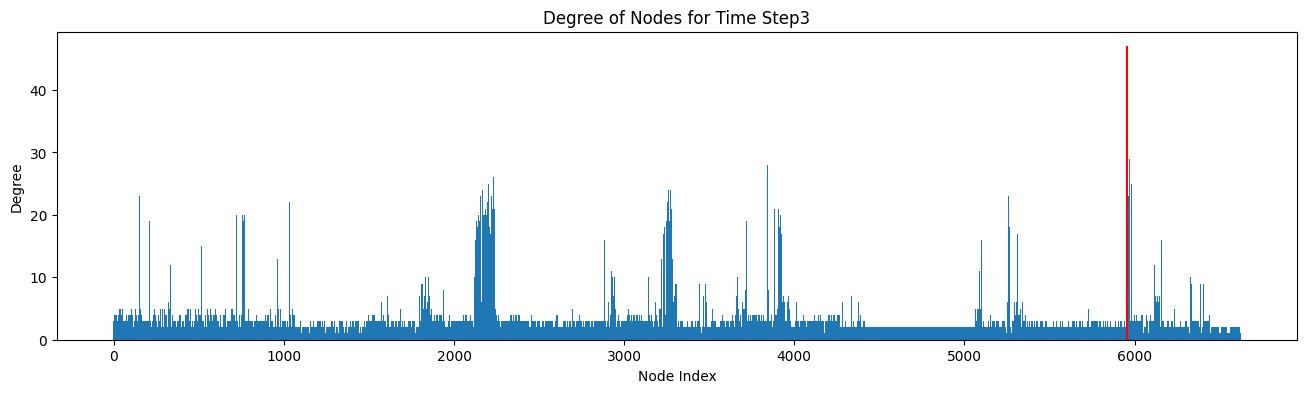

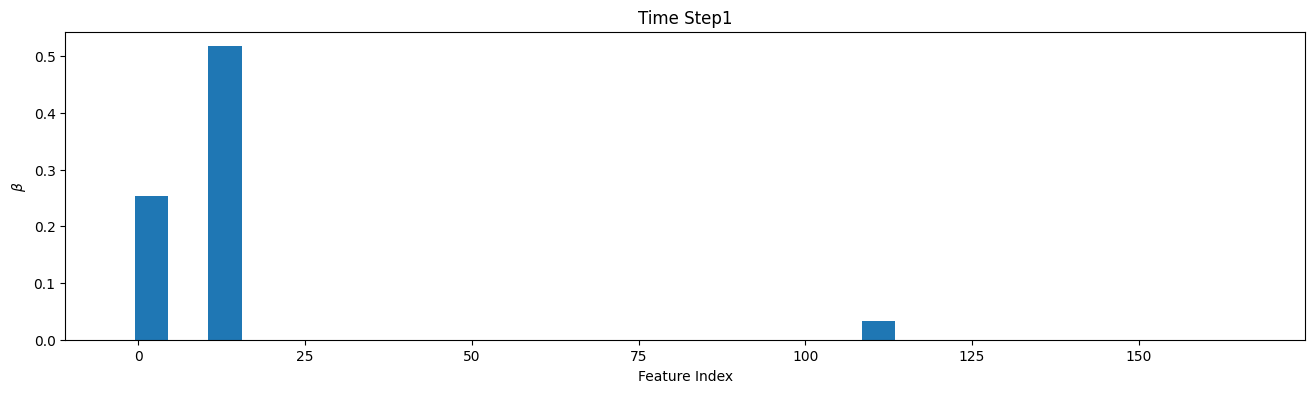

In [20]:
def test(srno):

  df_features = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_features.csv', header=None)
  df_edges = pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
  df_classes =  pd.read_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
  df_classes['class'] = df_classes['class'].map({'unknown': 2, '1':1, '2':0})

  # merging dataframes
  df_merge = df_features.merge(df_classes, how='left', right_on="txId", left_on=0)
  df_merge = df_merge.loc[df_merge[1] == srno]
  df_merge = df_merge.sort_values(0).reset_index(drop=True)
  classified = df_merge.loc[df_merge['class'].loc[df_merge['class']!=2].index].drop('txId', axis=1)
  unclassified = df_merge.loc[df_merge['class'].loc[df_merge['class']==2].index].drop('txId', axis=1)

  # storing classified unclassified nodes seperatly for training and testing purpose
  classified_edges = df_edges.loc[df_edges['txId1'].isin(classified[0]) & df_edges['txId2'].isin(classified[0])]
  unclassified_edges = df_edges.loc[df_edges['txId1'].isin(unclassified[0]) | df_edges['txId2'].isin(unclassified[0])]
  del df_features, df_classes

  edgess =  df_edges.loc[df_edges['txId1'].isin(df_merge[0]) & df_edges['txId2'].isin(df_merge[0])]

  # all nodes in data
  nodes = df_merge[0].values
  map_id = {j:i for i,j in enumerate(nodes)} # mapping nodes to indexes

  edges = edgess.copy()
  edges.txId1 = edges.txId1.map(map_id)
  edges.txId2 = edges.txId2.map(map_id)

  edge_index = np.array(edges.values).T
  edge_index = torch.tensor(edge_index, dtype=torch.long).contiguous()
  weights = torch.tensor([1]* edge_index.shape[1] , dtype=torch.double)

  # maping txIds to corresponding indexes, to pass node features to the model
  node_features = df_merge.drop(['txId'], axis=1).copy()
  node_features[0] = node_features[0].map(map_id)
  classified_idx = node_features['class'].loc[node_features['class']!=2].index
  unclassified_idx = node_features['class'].loc[node_features['class']==2].index
  # replace unkown class with 0, to avoid having 3 classes, this data/labels never used in training
  node_features['class'] = node_features['class'].replace(2, 0)

  labels = node_features['class'].values
  node_features = torch.tensor(np.array(node_features.drop([0, 'class', 1], axis=1).values, dtype=np.double), dtype=torch.double)

  # converting data to PyGeometric graph data format
  data_train = Data(x=node_features, edge_index=edge_index, edge_attr=weights,
                               y=torch.tensor(labels, dtype=torch.double)) #, adj= torch.from_numpy(np.array(adj))


  y_train = labels[classified_idx]

  # spliting train set and validation set
  from sklearn.model_selection import train_test_split
  X_train, X_valid, y_train, y_valid, train_idx, valid_idx = train_test_split(node_features[classified_idx], y_train, classified_idx, test_size=0.15, random_state=42, stratify=y_train)

  train_idx
  ten_train_idx = torch.tensor(train_idx)
  ten_train_idx

  from torch_geometric.utils import index_to_mask, mask_to_index
  train_mask = index_to_mask(ten_train_idx, size= len(labels))
  train_mask.shape

  valid_idx
  ten_valid_idx = torch.tensor(valid_idx)
  ten_valid_idx

  from torch_geometric.utils import index_to_mask, mask_to_index
  val_mask = index_to_mask(ten_valid_idx, size= len(labels))
  val_mask.shape

  # converting data to PyGeometric graph data format
  data_train = Data(x=torch.tensor(node_features,dtype=torch.float),
                  edge_index=edge_index, #edge_attr=weights,
                               y=torch.tensor(labels, dtype=torch.long),
                  train_mask=torch.tensor(train_mask,dtype=torch.bool),
                  val_mask=torch.tensor(val_mask,dtype=torch.bool)) #, adj= torch.from_numpy(np.array(adj))

  print(data_train)
  #outt_file = '/content/drive/MyDrive/GraphLIME_TS/Information/result'+ str(srno) + '.txt'
  with open("/content/drive/MyDrive/GraphLIME_TS/Information/result.txt", "a+") as o:
    o.write('\nTime Step ' + str(srno) + '\n')
    o.write(f' {data_train}')

  #visualize the Graph
  plt.figure(figsize=(16, 12))
  G = to_networkx(data_train, to_undirected=True)
  #pos = nx.spring_layout(G, k=0.1)
  #nx.draw_networkx(G, with_labels=False, node_size=30)
  #plt.title('AML');

  #extract the degree value
  degrees = dict(nx.degree(G))
  node_indices = list(degrees.keys())
  node_degrees = list(degrees.values())

  max_degree = max(node_degrees)
  node_idx = np.argmax(node_degrees).item()

  plt.figure(figsize=(16, 4))
  plt.bar(node_indices, node_degrees, width=5.0)
  plt.vlines(x=node_idx, ymin=0, ymax=max_degree, colors='r')
  plt.title('Degree of Nodes for Time Step'+str(srno))
  plt.xlabel('Node Index')
  plt.ylabel('Degree');

  rootdir = '/content/drive/MyDrive/GraphLIME_TS/features/'
  output_file = os.path.join(rootdir, 'TS'+ str(srno) + '.png')
  plt.savefig(output_file)


  print(f'Node {node_idx} has the largest degree value {max_degree}.')

  #define a GCN class

  class Net(torch.nn.Module):
          def __init__(self, num_features, dim=16, num_classes=1):
            super(Net, self).__init__()
            self.conv1 = GCNConv(num_features, dim)
            self.conv2 = GCNConv(dim, num_classes)

          def forward(self, x, edge_index, data=None):
            x = F.relu(self.conv1(x, edge_index))
            x = F.dropout(x, training=self.training)
            x = self.conv2(x, edge_index)
            return F.log_softmax(x, dim=1)

  epochs = 300
  dim = 16

  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = Net(num_features=data_train.num_node_features, dim=dim, num_classes=int(max(data_train.y).item())+1).to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-3)

  def test(model, data):
        model.eval()
        logits, accs = model(data_train.x, data_train.edge_index, data), []
        for _, mask in data('train_mask', 'val_mask'):
            pred = logits[mask].max(1)[1]
            acc = pred.eq(data_train.y[mask]).sum().item() / mask.sum().item()
            accs.append(acc)
        return accs


  loss = 999.0
  train_acc = 0.0
  test_acc = 0.0

  t = trange(epochs, desc="Stats: ", position=0)

  for epoch in t:

    model.train()

    loss = 0

    data = data_train.to(device)
    optimizer.zero_grad()
    log_logits = model(data_train.x, data_train.edge_index, data_train)

     # Since the data is a single huge graph, training on the training set is done by masking the nodes that are not in the training set.
    loss = F.nll_loss(log_logits[data_train.train_mask], data_train.y[data_train.train_mask])
    loss.backward()
    optimizer.step()

    # validate
    train_acc, test_acc = test(model, data_train)
    train_loss = loss

    model.eval()

  # instantiate a GraphLIME object
  explainer = GraphLIME(model, hop=2, rho=0.1, cached=True)

  # explain node features by calling the method `explain_node()`
  coefs = explainer.explain_node(node_idx, data_train.x, data_train.edge_index)
  coefs

  with open("/content/drive/MyDrive/GraphLIME_TS/Information/matrix.csv", "a+") as o:
    o.write("Coefficient of Time Step"+str(srno)+'\n')
    o.write(f' {coefs}')
    o.write("\n")


  #visualize the coefficeints
  plt.figure(figsize=(16, 4))

  x = list(range(data_train.num_node_features))

  plt.bar(x, coefs, width=5.0)
  plt.xlabel('Feature Index')
  plt.ylabel(r'$\beta$');
  out = "Time Step" + str(1);
  plt.title(out);

  print(f'The {np.argmax(coefs)}-th feature is the most important.')

test(3)